## Analysis on factors that cause the difference of GSP in each countries (Singapore, Korea, Malaysia, Mynmar)

In [15]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#read the data
df=pd.read_csv('Data Sets/DA DS 2.csv')

print(df)

    Country Name                                        Series Name   
0      Singapore                Agriculture, value added (% of GDP)  \
1      Singapore  Ease of doing business index (1=most business-...   
2      Singapore  Employers, total (% of total employment) (mode...   
3      Singapore  Employers, female (% of female employment) (mo...   
4      Singapore  Employers, male (% of male employment) (modele...   
..           ...                                                ...   
167      Myanmar  Self-employed, total (% of total employment) (...   
168      Myanmar            Technicians in R&D (per million people)   
169      Myanmar           Time required to start a business (days)   
170      Myanmar  Unemployment with advanced education (% of tot...   
171      Myanmar  Unemployment, total (% of total labor force) (...   

    2000 [YR2000] 2001 [YR2001] 2002 [YR2002] 2003 [YR2003] 2004 [YR2004]   
0     0.092120881   0.082638377   0.071311469   0.061421645   0.055958

In [16]:
#replace '..' with NaN
df.replace('..', np.nan, inplace=True)

df.head(30)

,Country Name,Series Name,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016]
0,Singapore,"Agriculture, value added (% of GDP)",0.092120881,0.082638377,0.071311469,0.061421645,0.055958114,0.055075115,0.049013137,0.042986207,0.041620646,0.040949339,0.036728997,0.034542245,0.033172299,0.033966491,0.034984017,0.031095003,0.029934187
1,Singapore,Ease of doing business index (1=most business-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Singapore,"Employers, total (% of total employment) (mode...",5.78399992,5.186999798,5.21999979,5.248000145,5.425000191,5.097000122,5.127999783,5.139999866,5.112999916,4.928999901,5.334000111,5.428999901,6.05700016,6.276000023,5.350999832,5.745999813,5.77699995
3,Singapore,"Employers, female (% of female employment) (mo...",2.921000004,2.135999918,2.509000063,2.536999941,2.645999908,2.855999947,2.915999889,2.779999971,2.877000093,2.798000097,3.092000008,3.325999975,3.743000031,4.210999966,3.308000088,3.563999891,3.59100008
4,Singapore,"Employers, male (% of male employment) (modele...",7.703000069,7.263000011,7.046000004,7.111999989,7.366000175,6.671000004,6.693999767,6.826000214,6.794000149,6.526000023,7.056000233,7.06799984,7.879000187,7.912000179,6.993000031,7.525000095,7.561999798
5,Singapore,Employment in agriculture (% of total employme...,0.147,0.708000004,0.68900001,0.713999987,0.741999984,0.924000025,1.077999949,0.991999984,1.07099998,0.141000003,0.126000002,1.036999941,1.139999986,1.139000058,1.026000023,0.944000006,0.118000001
6,Singapore,Employment in industry (% of total employment)...,33.85699844,25.95199966,25.28800011,25.1420002,24.0909996,21.8220005,22.25900078,22.63199997,22.69199944,31.35400009,30.38599968,19.75399971,19.39800072,18.7329998,16.66799927,16.38999939,16.29400063
7,Singapore,Employment in services (% of total employment)...,65.9960022,73.33999634,74.02300262,74.14399719,75.16699982,77.2539978,76.66300201,76.375,76.23699951,68.50499725,69.48799896,79.20899963,79.46199799,80.1269989,82.30599976,82.66600037,83.58799744
8,Singapore,Export value index (2000 = 100),100,88.35084613,90.83698586,116.035819,144.1445822,166.6490087,197.2417346,217.1982816,245.4036327,195.808806,255.3388087,297.1636382,296.3580353,297.705219,297.0187368,251.5442948,245.3354039
9,Singapore,Export volume index (2000 = 100),100,95.32264133,100.1189916,116.4822218,155.3518013,173.4862666,191.8067444,207.8682626,217.1077509,194.6613677,235.1613207,246.7923996,247.3685448,255.7591007,261.8779983,260.8668046,270.397893


In [17]:
# remove data with more than 8 missing values
df = df[df.isnull().sum(axis=1) <= 8]

df.head(30)

,Country Name,Series Name,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016]
0,Singapore,"Agriculture, value added (% of GDP)",0.092120881,0.082638377,0.071311469,0.061421645,0.055958114,0.055075115,0.049013137,0.042986207,0.041620646,0.040949339,0.036728997,0.034542245,0.033172299,0.033966491,0.034984017,0.031095003,0.029934187
2,Singapore,"Employers, total (% of total employment) (mode...",5.78399992,5.186999798,5.21999979,5.248000145,5.425000191,5.097000122,5.127999783,5.139999866,5.112999916,4.928999901,5.334000111,5.428999901,6.05700016,6.276000023,5.350999832,5.745999813,5.77699995
3,Singapore,"Employers, female (% of female employment) (mo...",2.921000004,2.135999918,2.509000063,2.536999941,2.645999908,2.855999947,2.915999889,2.779999971,2.877000093,2.798000097,3.092000008,3.325999975,3.743000031,4.210999966,3.308000088,3.563999891,3.59100008
4,Singapore,"Employers, male (% of male employment) (modele...",7.703000069,7.263000011,7.046000004,7.111999989,7.366000175,6.671000004,6.693999767,6.826000214,6.794000149,6.526000023,7.056000233,7.06799984,7.879000187,7.912000179,6.993000031,7.525000095,7.561999798
5,Singapore,Employment in agriculture (% of total employme...,0.147,0.708000004,0.68900001,0.713999987,0.741999984,0.924000025,1.077999949,0.991999984,1.07099998,0.141000003,0.126000002,1.036999941,1.139999986,1.139000058,1.026000023,0.944000006,0.118000001
6,Singapore,Employment in industry (% of total employment)...,33.85699844,25.95199966,25.28800011,25.1420002,24.0909996,21.8220005,22.25900078,22.63199997,22.69199944,31.35400009,30.38599968,19.75399971,19.39800072,18.7329998,16.66799927,16.38999939,16.29400063
7,Singapore,Employment in services (% of total employment)...,65.9960022,73.33999634,74.02300262,74.14399719,75.16699982,77.2539978,76.66300201,76.375,76.23699951,68.50499725,69.48799896,79.20899963,79.46199799,80.1269989,82.30599976,82.66600037,83.58799744
8,Singapore,Export value index (2000 = 100),100,88.35084613,90.83698586,116.035819,144.1445822,166.6490087,197.2417346,217.1982816,245.4036327,195.808806,255.3388087,297.1636382,296.3580353,297.705219,297.0187368,251.5442948,245.3354039
9,Singapore,Export volume index (2000 = 100),100,95.32264133,100.1189916,116.4822218,155.3518013,173.4862666,191.8067444,207.8682626,217.1077509,194.6613677,235.1613207,246.7923996,247.3685448,255.7591007,261.8779983,260.8668046,270.397893
10,Singapore,Exports of goods and services (% of GDP),189.1812439,184.4794251,185.9709567,205.175099,216.421375,226.227166,230.10633,214.7636607,231.1944905,192.1680995,199.7474571,203.2375792,197.0572179,194.0824546,191.2734511,177.3917081,168.1919704


In [18]:
#seperate the data into different countries and export to csv according to country name
countries = df['Country Name'].unique()
for country in countries:
    df_country = df[df['Country Name'] == country]
    df_country.to_csv(f'Data Sets/{country}.csv', index=False)

# Data for Singapore

In [19]:
#Read the data for Singapore
data=pd.read_csv('Data Sets/Singapore.csv')

In [20]:
#fill the missing values using mean imputation

data_copy=data.drop(columns=['Country Name','Series Name'])
data_copy.fillna(data_copy.median(), inplace=True)

data_copy.head(30)

,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016]
0,9.212088e-02,8.263838e-02,7.131147e-02,6.142164e-02,5.595811e-02,5.507512e-02,4.901314e-02,4.298621e-02,4.162065e-02,4.094934e-02,3.672900e-02,3.454224e-02,3.317230e-02,3.396649e-02,3.498402e-02,3.109500e-02,2.993419e-02
1,5.784000e+00,5.187000e+00,5.220000e+00,5.248000e+00,5.425000e+00,5.097000e+00,5.128000e+00,5.140000e+00,5.113000e+00,4.929000e+00,5.334000e+00,5.429000e+00,6.057000e+00,6.276000e+00,5.351000e+00,5.746000e+00,5.777000e+00
2,2.921000e+00,2.136000e+00,2.509000e+00,2.537000e+00,2.646000e+00,2.856000e+00,2.916000e+00,2.780000e+00,2.877000e+00,2.798000e+00,3.092000e+00,3.326000e+00,3.743000e+00,4.211000e+00,3.308000e+00,3.564000e+00,3.591000e+00
3,7.703000e+00,7.263000e+00,7.046000e+00,7.112000e+00,7.366000e+00,6.671000e+00,6.694000e+00,6.826000e+00,6.794000e+00,6.526000e+00,7.056000e+00,7.068000e+00,7.879000e+00,7.912000e+00,6.993000e+00,7.525000e+00,7.562000e+00
4,1.470000e-01,7.080000e-01,6.890000e-01,7.140000e-01,7.420000e-01,9.240000e-01,1.078000e+00,9.920000e-01,1.071000e+00,1.410000e-01,1.260000e-01,1.037000e+00,1.140000e+00,1.139000e+00,1.026000e+00,9.440000e-01,1.180000e-01
5,3.385700e+01,2.595200e+01,2.528800e+01,2.514200e+01,2.409100e+01,2.182200e+01,2.225900e+01,2.263200e+01,2.269200e+01,3.135400e+01,3.038600e+01,1.975400e+01,1.939800e+01,1.873300e+01,1.666800e+01,1.639000e+01,1.629400e+01
6,6.599600e+01,7.334000e+01,7.402300e+01,7.414400e+01,7.516700e+01,7.725400e+01,7.666300e+01,7.637500e+01,7.623700e+01,6.850500e+01,6.948800e+01,7.920900e+01,7.946200e+01,8.012700e+01,8.230600e+01,8.266600e+01,8.358800e+01
7,1.000000e+02,8.835085e+01,9.083699e+01,1.160358e+02,1.441446e+02,1.666490e+02,1.972417e+02,2.171983e+02,2.454036e+02,1.958088e+02,2.553388e+02,2.971636e+02,2.963580e+02,2.977052e+02,2.970187e+02,2.515443e+02,2.453354e+02
8,1.000000e+02,9.532264e+01,1.001190e+02,1.164822e+02,1.553518e+02,1.734863e+02,1.918067e+02,2.078683e+02,2.171078e+02,1.946614e+02,2.351613e+02,2.467924e+02,2.473685e+02,2.557591e+02,2.618780e+02,2.608668e+02,2.703979e+02
9,1.891812e+02,1.844794e+02,1.859710e+02,2.051751e+02,2.164214e+02,2.262272e+02,2.301063e+02,2.147637e+02,2.311945e+02,1.921681e+02,1.997475e+02,2.032376e+02,1.970572e+02,1.940825e+02,1.912735e+02,1.773917e+02,1.681920e+02


In [21]:
#combine the data with the country name and series name
data_copy['Series Name']=data['Series Name']

data_copy.head(30)

,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],Series Name
0,9.212088e-02,8.263838e-02,7.131147e-02,6.142164e-02,5.595811e-02,5.507512e-02,4.901314e-02,4.298621e-02,4.162065e-02,4.094934e-02,3.672900e-02,3.454224e-02,3.317230e-02,3.396649e-02,3.498402e-02,3.109500e-02,2.993419e-02,"Agriculture, value added (% of GDP)"
1,5.784000e+00,5.187000e+00,5.220000e+00,5.248000e+00,5.425000e+00,5.097000e+00,5.128000e+00,5.140000e+00,5.113000e+00,4.929000e+00,5.334000e+00,5.429000e+00,6.057000e+00,6.276000e+00,5.351000e+00,5.746000e+00,5.777000e+00,"Employers, total (% of total employment) (mode..."
2,2.921000e+00,2.136000e+00,2.509000e+00,2.537000e+00,2.646000e+00,2.856000e+00,2.916000e+00,2.780000e+00,2.877000e+00,2.798000e+00,3.092000e+00,3.326000e+00,3.743000e+00,4.211000e+00,3.308000e+00,3.564000e+00,3.591000e+00,"Employers, female (% of female employment) (mo..."
3,7.703000e+00,7.263000e+00,7.046000e+00,7.112000e+00,7.366000e+00,6.671000e+00,6.694000e+00,6.826000e+00,6.794000e+00,6.526000e+00,7.056000e+00,7.068000e+00,7.879000e+00,7.912000e+00,6.993000e+00,7.525000e+00,7.562000e+00,"Employers, male (% of male employment) (modele..."
4,1.470000e-01,7.080000e-01,6.890000e-01,7.140000e-01,7.420000e-01,9.240000e-01,1.078000e+00,9.920000e-01,1.071000e+00,1.410000e-01,1.260000e-01,1.037000e+00,1.140000e+00,1.139000e+00,1.026000e+00,9.440000e-01,1.180000e-01,Employment in agriculture (% of total employme...
5,3.385700e+01,2.595200e+01,2.528800e+01,2.514200e+01,2.409100e+01,2.182200e+01,2.225900e+01,2.263200e+01,2.269200e+01,3.135400e+01,3.038600e+01,1.975400e+01,1.939800e+01,1.873300e+01,1.666800e+01,1.639000e+01,1.629400e+01,Employment in industry (% of total employment)...
6,6.599600e+01,7.334000e+01,7.402300e+01,7.414400e+01,7.516700e+01,7.725400e+01,7.666300e+01,7.637500e+01,7.623700e+01,6.850500e+01,6.948800e+01,7.920900e+01,7.946200e+01,8.012700e+01,8.230600e+01,8.266600e+01,8.358800e+01,Employment in services (% of total employment)...
7,1.000000e+02,8.835085e+01,9.083699e+01,1.160358e+02,1.441446e+02,1.666490e+02,1.972417e+02,2.171983e+02,2.454036e+02,1.958088e+02,2.553388e+02,2.971636e+02,2.963580e+02,2.977052e+02,2.970187e+02,2.515443e+02,2.453354e+02,Export value index (2000 = 100)
8,1.000000e+02,9.532264e+01,1.001190e+02,1.164822e+02,1.553518e+02,1.734863e+02,1.918067e+02,2.078683e+02,2.171078e+02,1.946614e+02,2.351613e+02,2.467924e+02,2.473685e+02,2.557591e+02,2.618780e+02,2.608668e+02,2.703979e+02,Export volume index (2000 = 100)
9,1.891812e+02,1.844794e+02,1.859710e+02,2.051751e+02,2.164214e+02,2.262272e+02,2.301063e+02,2.147637e+02,2.311945e+02,1.921681e+02,1.997475e+02,2.032376e+02,1.970572e+02,1.940825e+02,1.912735e+02,1.773917e+02,1.681920e+02,Exports of goods and services (% of GDP)


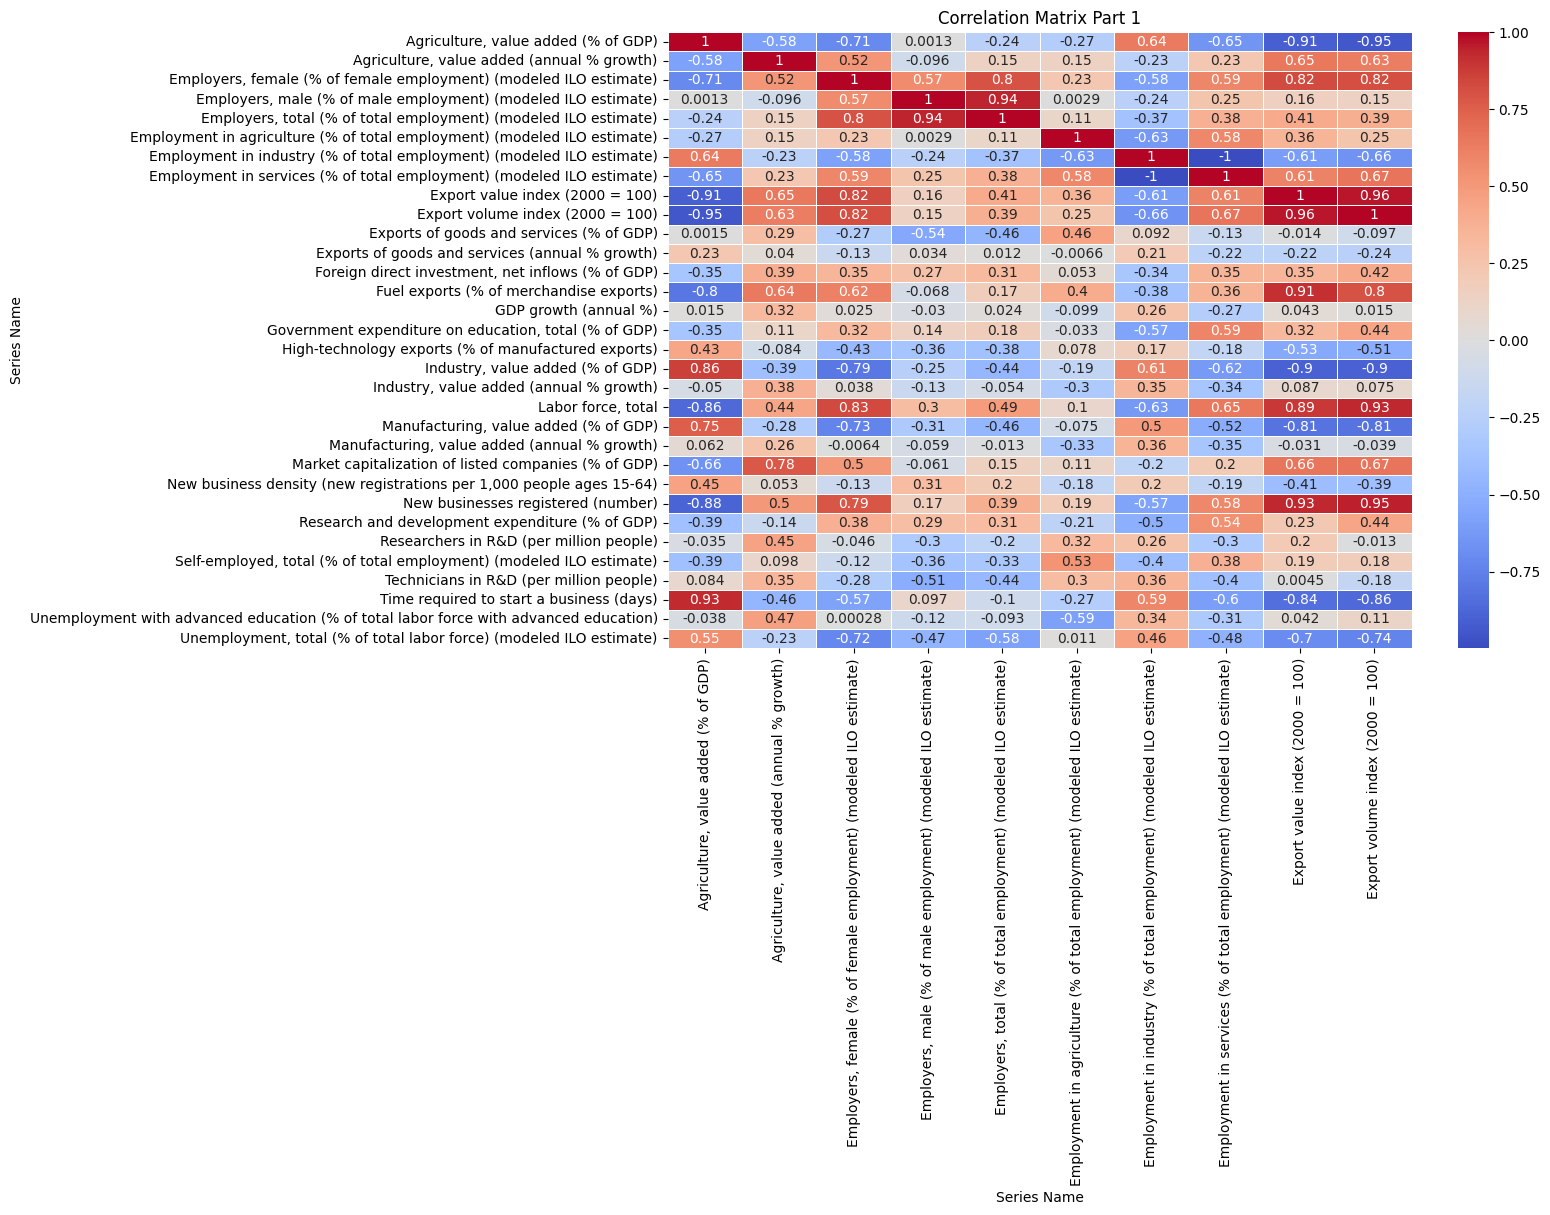

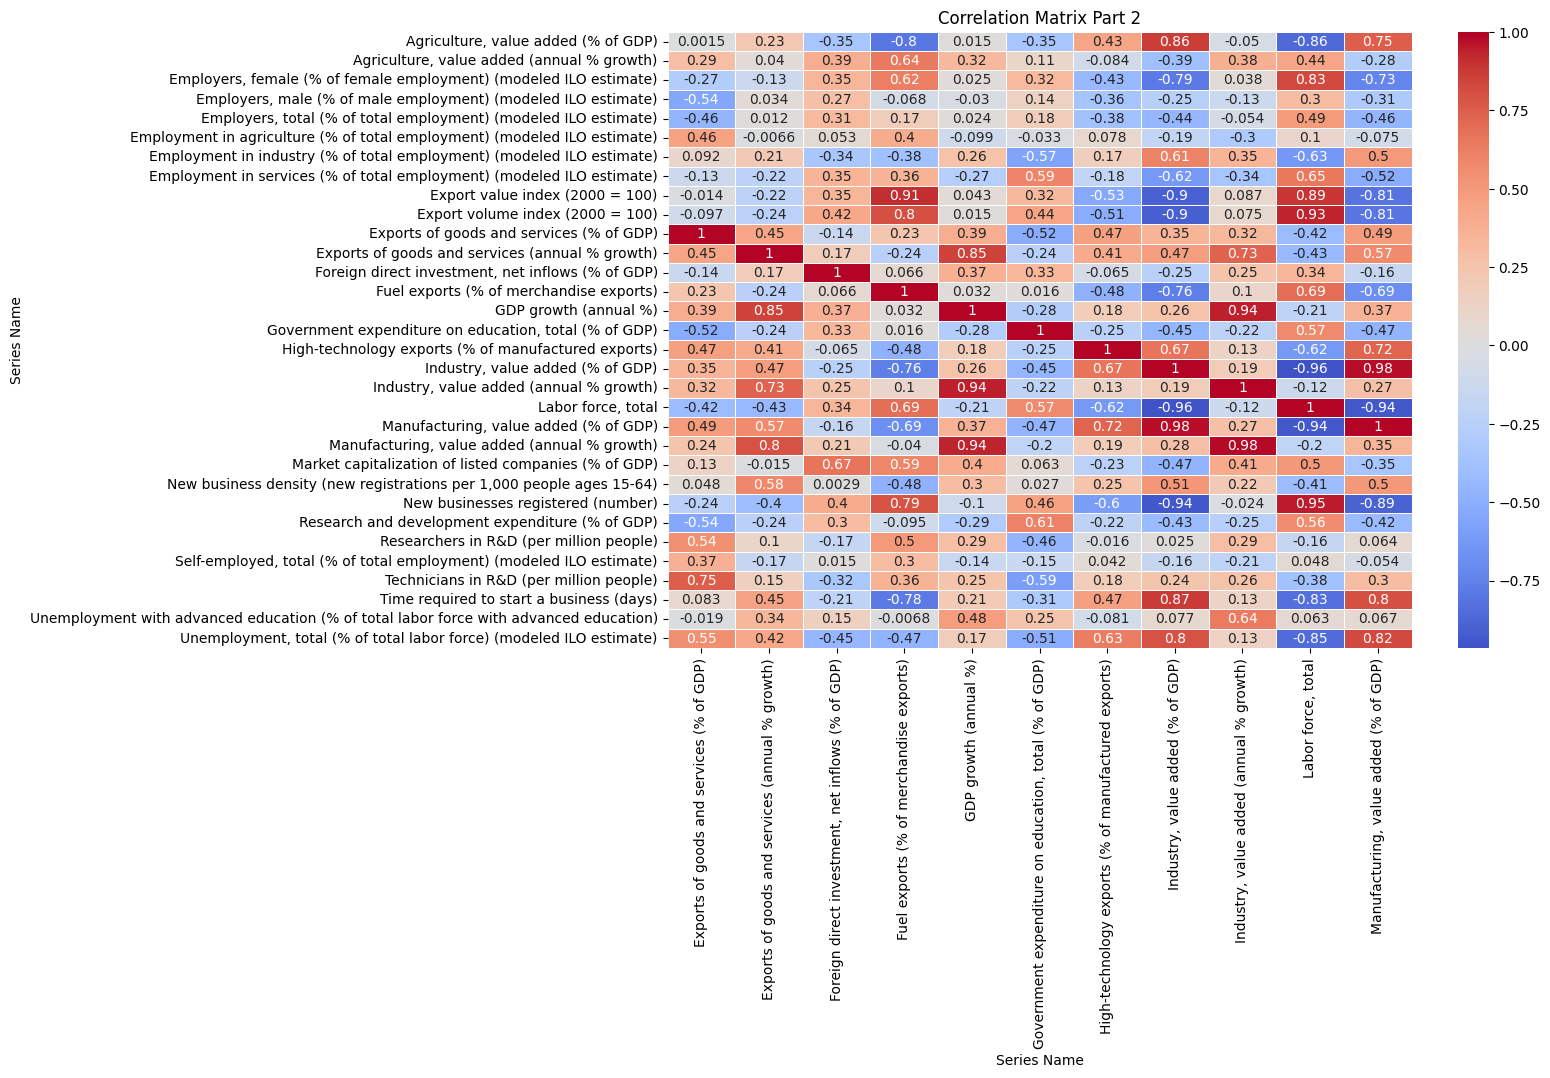

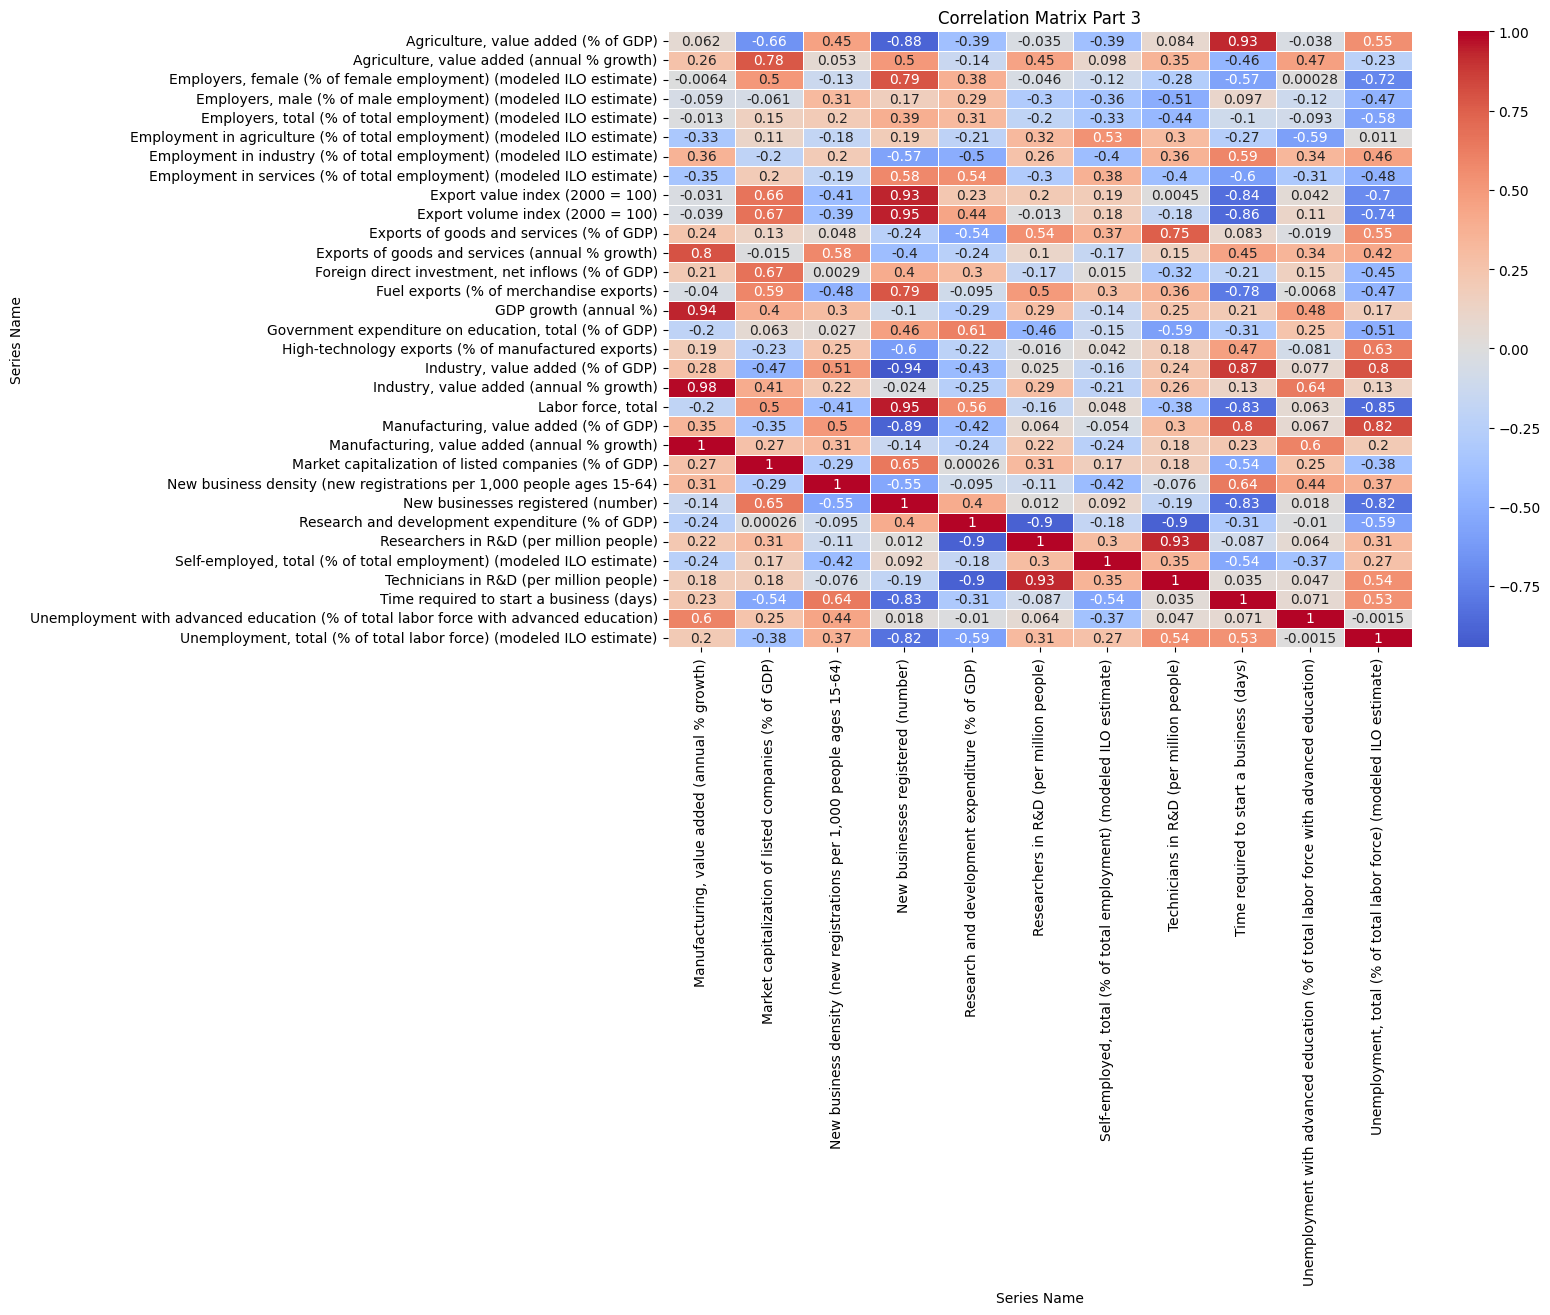

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape the data to have years as rows and Series Names as columns
data_melted = data_copy.melt(id_vars='Series Name', var_name='Year', value_name='Value')
data_pivot = data_melted.pivot(index='Year', columns='Series Name', values='Value')

# Drop rows with any NaN values (or use imputation as needed)
data_pivot.dropna(inplace=True)

# Calculate the correlation matrix
correlation_matrix = data_pivot.corr()

# Split the correlation matrix into three parts
n_cols = correlation_matrix.shape[1]
split1 = correlation_matrix.iloc[:, :n_cols//3]
split2 = correlation_matrix.iloc[:, n_cols//3:(2*n_cols)//3]
split3 = correlation_matrix.iloc[:, (2*n_cols)//3:]

# Function to plot heatmap
def plot_heatmap(data, title):
    plt.figure(figsize=(12, 8))
    sns.heatmap(data, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
    plt.title(title)
    plt.show()

# Plot the heatmaps
plot_heatmap(split1, 'Correlation Matrix Part 1')
plot_heatmap(split2, 'Correlation Matrix Part 2')
plot_heatmap(split3, 'Correlation Matrix Part 3')


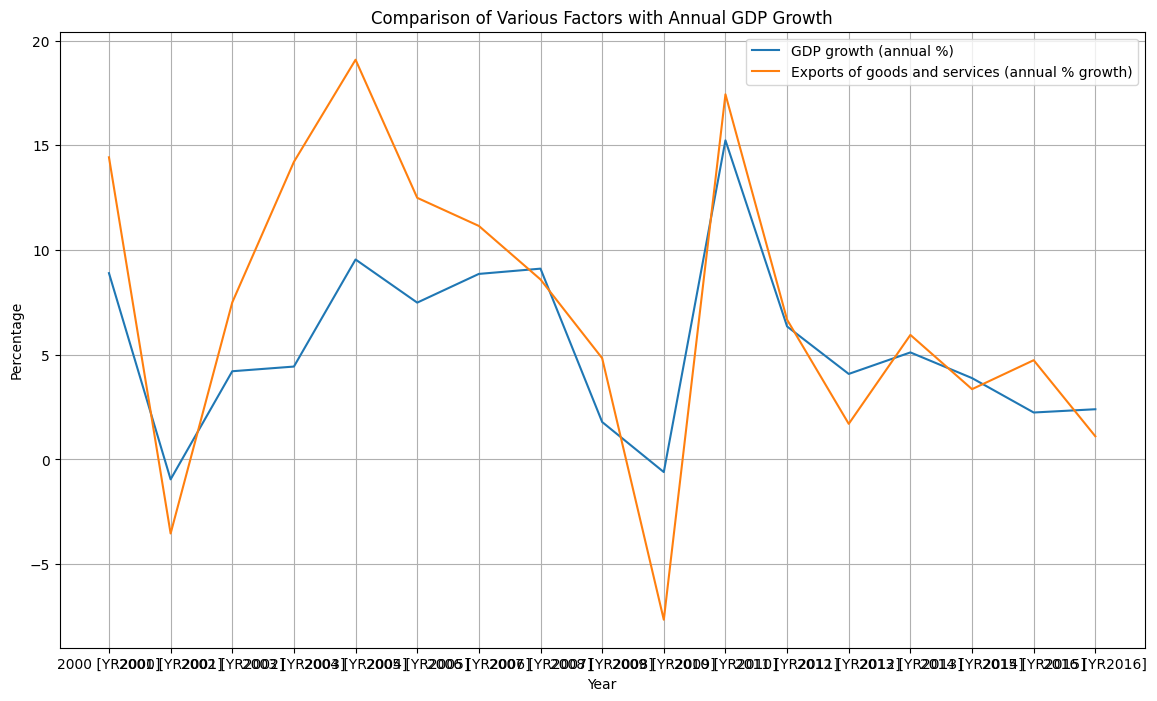

In [23]:
# Select the required columns
columns_of_interest = [
    'GDP growth (annual %)',
    'Exports of goods and services (annual % growth)',
]

# Check if the columns exist in the dataframe
for col in columns_of_interest:
    if col not in data_pivot.columns:
        print(f"Column '{col}' not found in the dataset.")
        exit()

# Plot the graph
plt.figure(figsize=(14, 8))

for col in columns_of_interest:
    plt.plot(data_pivot.index, data_pivot[col], label=col)

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Comparison of Various Factors with Annual GDP Growth')
plt.legend(loc='best')
plt.grid(True)
plt.show()

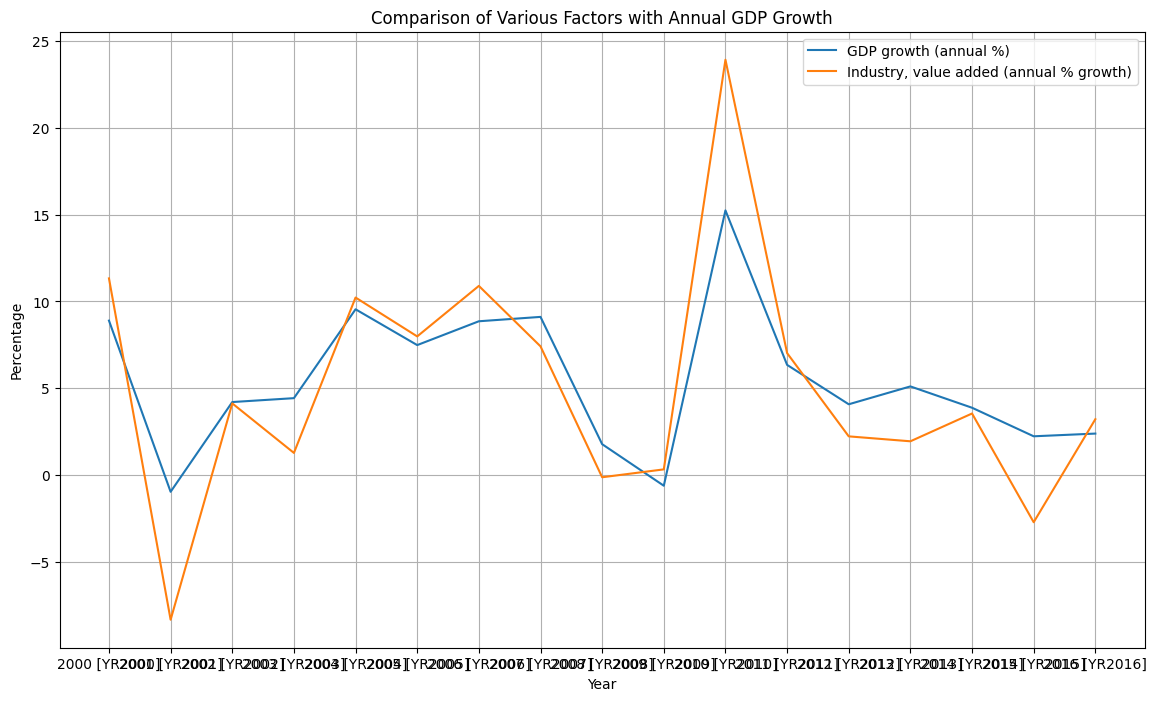

In [24]:
# Select the required columns
columns_of_interest = [
    'GDP growth (annual %)',
    'Industry, value added (annual % growth)'
]

# Check if the columns exist in the dataframe
for col in columns_of_interest:
    if col not in data_pivot.columns:
        print(f"Column '{col}' not found in the dataset.")
        exit()

# Plot the graph
plt.figure(figsize=(14, 8))

for col in columns_of_interest:
    plt.plot(data_pivot.index, data_pivot[col], label=col)

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Comparison of Various Factors with Annual GDP Growth')
plt.legend(loc='best')
plt.grid(True)
plt.show()

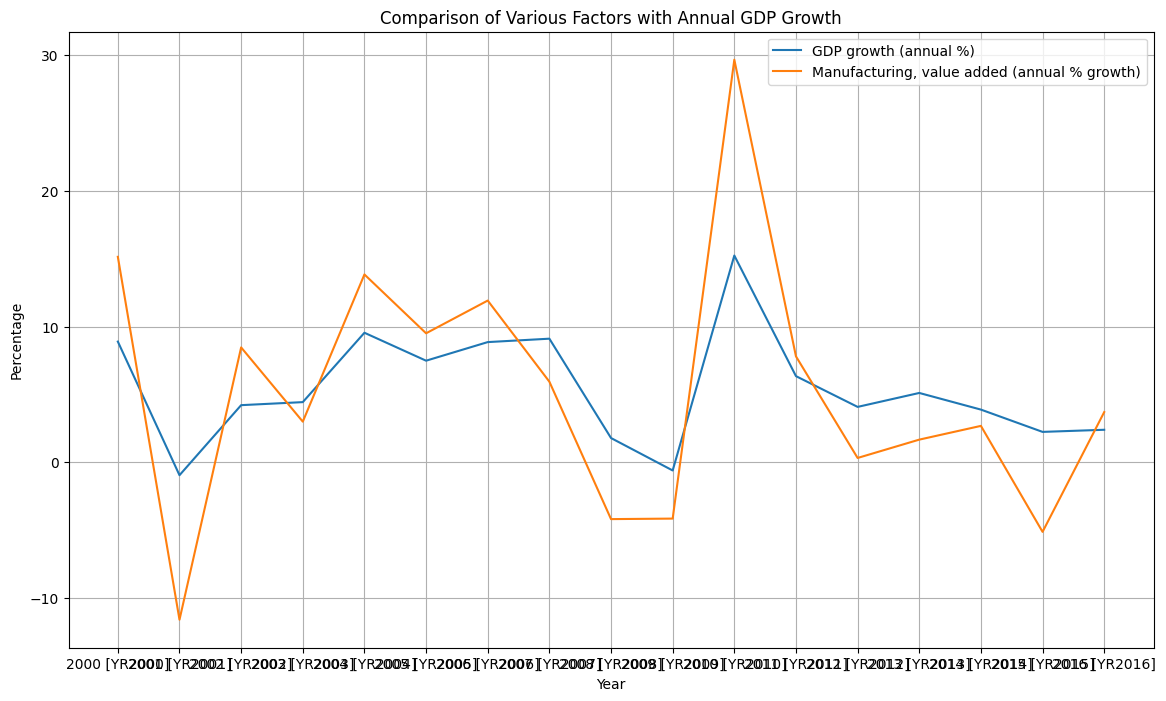

In [25]:
# Select the required columns
columns_of_interest = [
    'GDP growth (annual %)',
    'Manufacturing, value added (annual % growth)'
]

# Check if the columns exist in the dataframe
for col in columns_of_interest:
    if col not in data_pivot.columns:
        print(f"Column '{col}' not found in the dataset.")
        exit()

# Plot the graph
plt.figure(figsize=(14, 8))

for col in columns_of_interest:
    plt.plot(data_pivot.index, data_pivot[col], label=col)

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Comparison of Various Factors with Annual GDP Growth')
plt.legend(loc='best')
plt.grid(True)
plt.show()

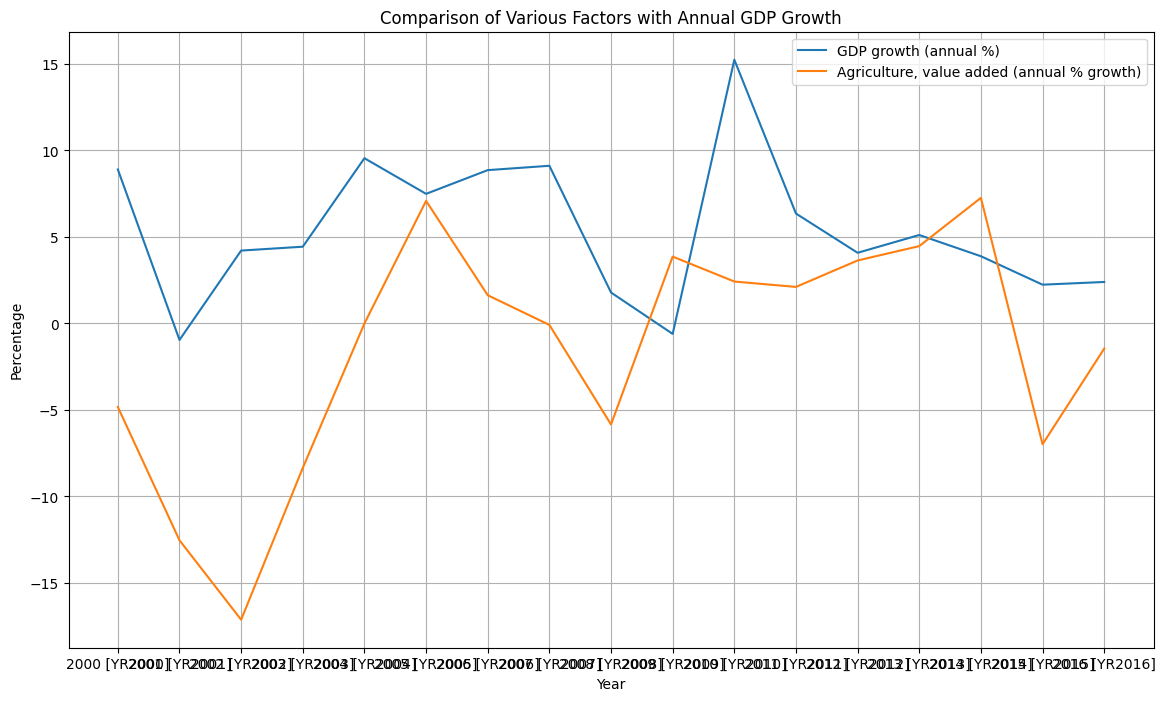

In [26]:
# Select the required columns
columns_of_interest = [
    'GDP growth (annual %)',
    'Agriculture, value added (annual % growth)'
]

# Check if the columns exist in the dataframe
for col in columns_of_interest:
    if col not in data_pivot.columns:
        print(f"Column '{col}' not found in the dataset.")
        exit()

# Plot the graph
plt.figure(figsize=(14, 8))

for col in columns_of_interest:
    plt.plot(data_pivot.index, data_pivot[col], label=col)

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Comparison of Various Factors with Annual GDP Growth')
plt.legend(loc='best')
plt.grid(True)
plt.show()

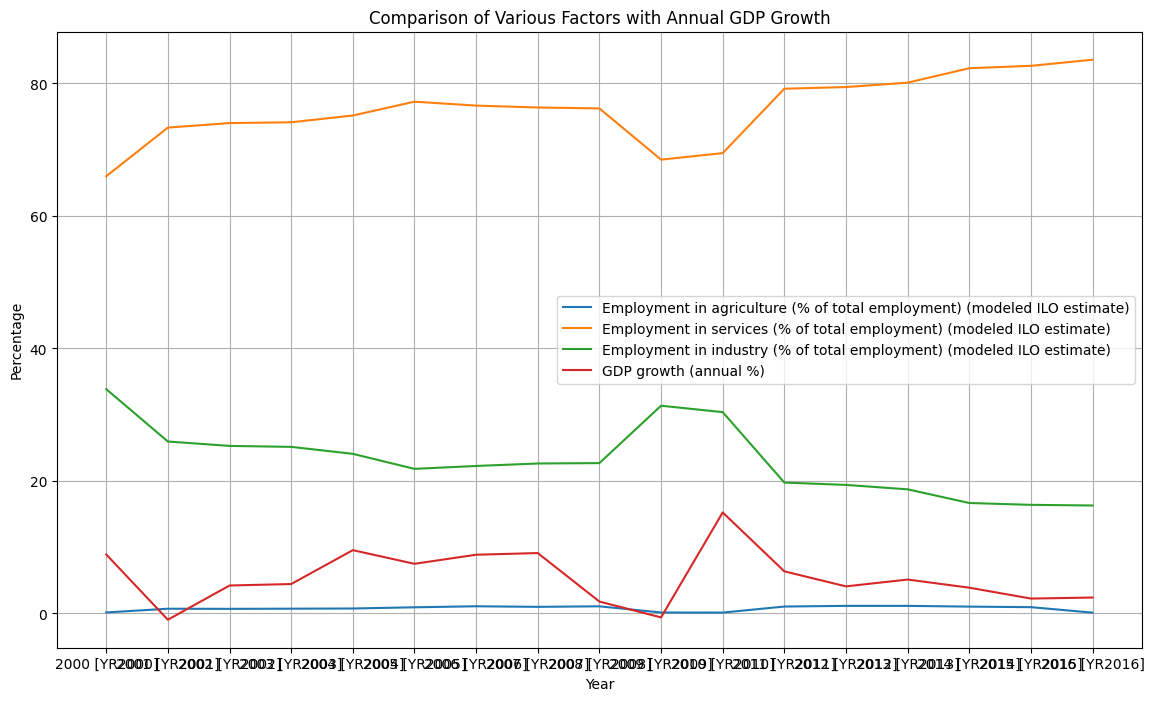

In [27]:
# Select the required columns
columns_of_interest = [
    'Employment in agriculture (% of total employment) (modeled ILO estimate)',
    'Employment in services (% of total employment) (modeled ILO estimate)',
    'Employment in industry (% of total employment) (modeled ILO estimate)',
    'GDP growth (annual %)'
    
]

# Check if the columns exist in the dataframe
for col in columns_of_interest:
    if col not in data_pivot.columns:
        print(f"Column '{col}' not found in the dataset.")
        exit()

# Plot the graph
plt.figure(figsize=(14, 8))

for col in columns_of_interest:
    plt.plot(data_pivot.index, data_pivot[col], label=col)

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Comparison of Various Factors with Annual GDP Growth')
plt.legend(loc='best')
plt.grid(True)
plt.show()